<img width=700px; src="../img/logoUPSayPlusCDS_990.png">

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Scipy</big></big></big></big></b></p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. File input/output - `scipy.io`

Scipy provides an `io` module to help load some data type. We can easily read MATLAB `.mat` files using `io.loadmat` and `io.savemat`.

In [2]:
from scipy.io import loadmat, savemat
a = np.ones((3, 3))
savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

<div class="alert alert-success">

<b>EXERCISE - `scipy.io`</b>:

 <ul>
  <li>Load the matfile from `data/spectra.mat` using `scipy.io.loadmat`.</li>
  <li>Extract from the loaded dictionary two variables (`spectra`, `frequency`). You should call `ravel` the `frequency` array to obtain a 1-D array.</li>
  <li>Plot the spectra in function of the frequency.</li>
</ul>

</div>

In [3]:
from scipy.io import loadmat

data = loadmat('data/spectra.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jul  2 10:28:00 2017',
 '__version__': '1.0',
 'frequency': array([[  400.095,   402.626,   405.155, ...,  3996.41 ,  3997.88 ,
          3999.36 ]]),
 'spectra': array([[ 0.0152963,  0.0152944,  0.0153142, ...,  0.017305 ,  0.0170706,
          0.0172018],
        [ 0.0143634,  0.0143292,  0.0143999, ...,  0.018519 ,  0.0186104,
          0.0187633],
        [ 0.0163027,  0.0161848,  0.0163573, ...,  0.017772 ,  0.0179032,
          0.0175998],
        ..., 
        [ 0.0145195,  0.014399 ,  0.0143937, ...,  0.0176497,  0.0174543,
          0.0174893],
        [ 0.0157462,  0.015478 ,  0.0154057, ...,  0.0177981,  0.0178682,
          0.0179989],
        [ 0.0160526,  0.0163989,  0.0162803, ...,  0.0182082,  0.0180114,
          0.0182391]])}

In [4]:
spectra = data['spectra']
spectra

array([[ 0.0152963,  0.0152944,  0.0153142, ...,  0.017305 ,  0.0170706,
         0.0172018],
       [ 0.0143634,  0.0143292,  0.0143999, ...,  0.018519 ,  0.0186104,
         0.0187633],
       [ 0.0163027,  0.0161848,  0.0163573, ...,  0.017772 ,  0.0179032,
         0.0175998],
       ..., 
       [ 0.0145195,  0.014399 ,  0.0143937, ...,  0.0176497,  0.0174543,
         0.0174893],
       [ 0.0157462,  0.015478 ,  0.0154057, ...,  0.0177981,  0.0178682,
         0.0179989],
       [ 0.0160526,  0.0163989,  0.0162803, ...,  0.0182082,  0.0180114,
         0.0182391]])

In [5]:
frequency = data['frequency'].ravel()
frequency

array([  400.095,   402.626,   405.155, ...,  3996.41 ,  3997.88 ,  3999.36 ])

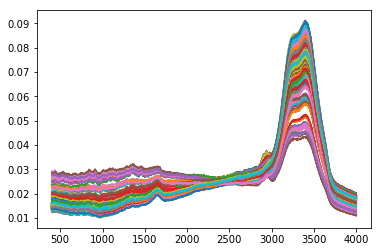

In [6]:
plt.plot(frequency, spectra.T)
plt.show()

## 2. Signal interpolation - `scipy.interpolate`

The scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. By imagining experimental data close to a sine function:

In [7]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

The `scipy.interpolate.interp1d` class can build a linear interpolation function:

In [8]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the `scipy.interpolate.linear_interp` instance needs to be evaluated at the time of interest:

In [9]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

A cubic interpolation can also be selected by providing the `kind` optional keyword argument:

In [10]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

Let's see the difference by plotting the results.

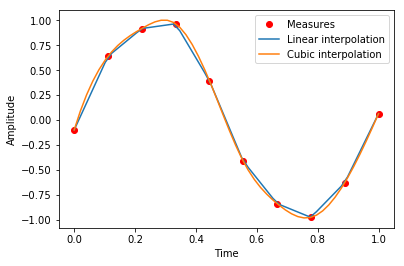

In [11]:
plt.plot(measured_time, measures, 'or', label='Measures')
plt.plot(computed_time, linear_results, label='Linear interpolation')
plt.plot(computed_time, cubic_results, label='Cubic interpolation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.interpolate`</b>:

 <ul>
  <li>Interpolate each spectra values corresponding to the integral frequencies {401, 402, ..., 3999} using `scipy.interpolate.interp1d`.</li>
  <li>Plot the spectra in function of the frequencies.</li>
</ul>

</div>

In [12]:
from scipy.interpolate import interp1d

frequency_interp = np.arange(401, 3999, 1)

spectra_interp = []
for spectrum in spectra:
    f_spectra = interp1d(frequency, spectrum)
    spectra_interp.append(f_spectra(frequency_interp))
    
# convert to a numpy array
spectra_interp = np.array(spectra_interp)
spectra_interp

array([[ 0.01529562,  0.01529487,  0.01529733, ...,  0.01734045,
         0.01721092,  0.01708124],
       [ 0.01435117,  0.01433766,  0.01433966, ...,  0.01853487,
         0.01855568,  0.0186228 ],
       [ 0.01626054,  0.01621396,  0.01621031, ...,  0.01784323,
         0.01782466,  0.0178786 ],
       ..., 
       [ 0.01447641,  0.0144288 ,  0.01439822, ...,  0.01760831,
         0.01757127,  0.01745714],
       [ 0.0156503 ,  0.01554433,  0.01546731, ...,  0.01789042,
         0.01782624,  0.0178788 ],
       [ 0.01617643,  0.01631325,  0.01638136, ...,  0.0181718 ,
         0.01812921,  0.01802986]])

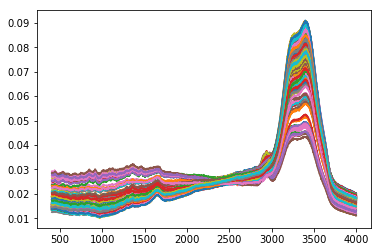

In [13]:
plt.plot(frequency_interp, spectra_interp.T)
plt.show()

## 3. Optimization - `scipy.optimize`

Optimization is the problem of finding a numerical solution to a minimization or equality.

The scipy.optimize module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [14]:
from scipy import optimize

### Finding the minimum of a scalar function

Let’s define the following function:

In [15]:
def f(x):
    return x ** 2 + 10 * np.sin(x)

and plot it:

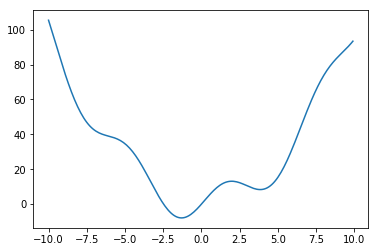

In [16]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The BFGS algorithm is a good way of doing this:

In [17]:
res = optimize.minimize(f, 0, method='L-BFGS-B')
res

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point:

In [18]:
res2 = optimize.minimize(f, 3, method='L-BFGS-B')
res2

      fun: array([ 8.31558558])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.77635684e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
   status: 0
  success: True
        x: array([ 3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use `scipy.optimize.basinhopping()` (which combines a local optimizer with stochastic sampling of starting points for the local optimizer):

In [19]:
optimize.basinhopping(f, 3, niter=1000)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08578058]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 18726
                        nit: 1000
                       njev: 6242
                          x: array([-1.30644001])

### Finding the roots of a scalar function

To find a root, i.e. a point where $f(x) = 0$, of the function f above we can use for example `scipy.optimize.fsolve()`:

In [20]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([ 0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [21]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Curve fitting

Suppose we have data sampled from $f$ with some noise:

In [22]:
xdata = np.linspace(-10, 10, num=100)
ydata = f(xdata) + np.random.normal(0, 2, xdata.shape)

Now if we know the functional form of the function from which the samples were drawn ($x^2 + \sin(x)$ in this case) but not the amplitudes of the terms, we can find those by least squares curve fitting. First we have to define the function to fit:

In [23]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use `scipy.optimize.curve_fit()` to find $a$ and $b$:

In [24]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([  0.99531289,  10.02923908])

### Summary in a single plot

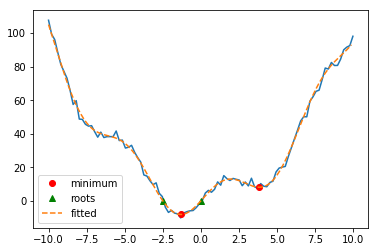

In [25]:
x = np.arange(-10, 10, 0.1)
plt.plot(xdata, ydata)
# plot the local minima
plt.plot(res.x, f(res.x), 'or', label='minimum')
plt.plot(res2.x, f(res2.x), 'or')
# plot the roots
plt.plot(root, f(root), '^g', label='roots')
plt.plot(root2, f(root2), '^g')
# plot the curved fitted
plt.plot(x, f2(x, params[0], params[1]), '--', label='fitted')
plt.legend()
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.optimize`</b>:

The previous spectra can be modelled using a simple function `model_bi_functions` which we defined as:

<br><br>

$$
    S(f)=\left\{
                \begin{array}{ll}
                  a f + b, & 0 < f < \mu - 3 \sigma \\
                  (a (\mu - 3 \sigma) + b) + \exp\left( - \frac{(f - \mu)^{2}}{2 \sigma^{2}} \right), & f \geq \mu - 3 \sigma\\
                \end{array}
              \right.
$$

See below a plot which illustrate the profile of this function.

 <ul>
  <li>Using `scipy.optimize.curve_fit`, fit `model_bi_functions` in the first spectra from `spectra_interp`. You also have to use `frequency_interp` as `x` values. Use the initial parameters `[0.0, 0.01, 100, 3300, 300]`</li>
  <li>Plot the results.</li>
</ul>

</div>

In [26]:
# import helper regarding normal distribution
from scipy.stats import norm

def find_nearest_index(array, value):
    """Find the nearest index of a value in an array."""
    idx = (np.abs(array - value)).argmin()
    return idx

def model_bi_functions(freqs, a=1e-5, b=0.01,
                      scale=100, mu=3300, sigma=300):
    """Model to be fitted.
    
    It corresponds to a line from [0, f0] and a
    Normal distribution profile from [f0, end].
    
    Parameters
    ----------
    freqs : ndarray, shape (n_freqs,)
        Frequencies for which the spectrum will be calculated
        
    a : float, (default=1e-5)
        Slope of the line.
        
    b : float, (default=0.01)
        Values where the line cut the y-axis.
        
    scale : float, (default=100)
        Scaling factor for the amplitude of the Gaussian profile.
        
    mu : float, (default=3300)
        Central value of the Gaussian profile.
        
    sigma : float, (default=300)
        Standard deviation of the Gaussian profile.
    
    """
    y = np.zeros(freqs.shape)
    # find the index of the inflexion point
    f0_idx = find_nearest_index(freqs, mu - 3 * sigma)
    # line equation
    y[:f0_idx] = a * freqs[:f0_idx] + b
    # Gaussian profile
    y[f0_idx:] = ((a * freqs[f0_idx] + b) +
                  (scale * norm.pdf(freqs[f0_idx:], mu, sigma)))
    return y

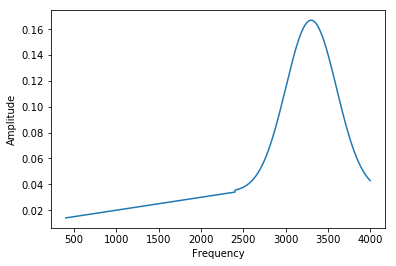

In [27]:
y = model_bi_functions(frequency_interp)
plt.plot(frequency_interp, y)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

In [28]:
from scipy.optimize import curve_fit

init_params = [0.0, 0.01, 100, 3300, 300]

popt, _ = curve_fit(model_bi_functions,
                    frequency_interp, spectra_interp[0],
                    p0=init_params)
popt

array([  4.73429761e-06,   1.21638832e-02,   2.20975344e+01,
         3.33386727e+03,   1.72122469e+02])

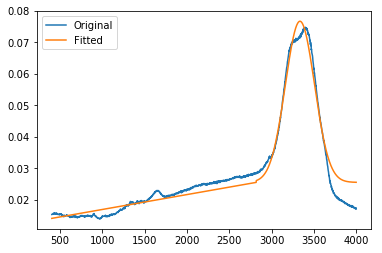

In [29]:
plt.plot(frequency_interp, spectra_interp[0], label='Original')
plt.plot(frequency_interp, model_bi_functions(frequency_interp,
                                              popt[0], popt[1],
                                              popt[2], popt[3],
                                              popt[4]),
        label='Fitted')
plt.legend()

## 4. Numerical integration - `scipy.integrate`

Given a function object, the most generic integration routine is `scipy.integrate.quad()`.

In [30]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi / 2)
res

0.9999999999999999

If only fixed sample are given, the trapeze method (`scipy.integrate.trapz()`) or Simpson's integration rule `scipy.integrate.simps()`) can be used.

In [31]:
x = np.linspace(0, np.pi / 2, num=200)
y = np.sin(x)

In [32]:
from scipy.integrate import simps
res = simps(y, x)
res

0.99999997944856944

<div class="alert alert-success">

<b>EXERCISE - `scipy.integrate`</b>:

We would be interested in the area under the Gaussian profile since it is related to what we want to quantify.

 <ul>
  <li>Using `scipy.integrate.simps`, compute the area under the Gaussian profile between $[\mu - 3 \sigma, \mu + 3 \sigma]$. Those parameters can be found as the results of the curve fitting previusly done. The indexes corresponding to the interval values can be computed using `find_nearest_index`.</li>
  <li>You can do the same using the original data to see the difference od quantification.</li>
</ul>

</div>

In [33]:
from scipy.integrate import simps

# compute the bounds
lower_bound = find_nearest_index(frequency_interp,
                                 popt[3] - 3 * popt[4])
upper_bound = find_nearest_index(frequency_interp,
                                 popt[3] + 3 * popt[4])

# compute the model
fitted_model = model_bi_functions(frequency_interp, popt[0], popt[1],
                                  popt[2], popt[3], popt[4])

# integrate the model
integral_fitted = simps(fitted_model[lower_bound:upper_bound],
                        frequency_interp[lower_bound:upper_bound])
print('Integration on the fitted data: {0:.2f}'.format(integral_fitted))

# integrate the original signal
integral_original = simps(spectra_interp[0][lower_bound:upper_bound],
                          frequency_interp[lower_bound:upper_bound])
print('Integration on the fitted data: {0:.2f}'.format(integral_original))

Integration on the fitted data: 48.35
Integration on the fitted data: 47.74


## 5. Linear algebra - `scipy.linalg`

The `scipy.linalg` offers basic operation used in linear algebra such as inverse (`scipy.linalg.inv`), pseudo-inverse (`scipy.linalg.pinv`), determinant (`scipy.linalg.det`) as well as decompostion as standard decompisition as SVD, QR, or Cholesky among others.

<div class="alert alert-warning">

<b>`np.array` vs. `np.matrix`:</b>

<br><br>

By default the multiplication between two `np.array` (i.e. `*` operator) do not lead to a matrix multiplication. You need to use `np.dot` to perform this operation.

<br><br>

Another possibility is to convert the `np.array` to `np.matrix` which perform this operation when using the operator `*`. The operations become more readable when there is a lot of algebric operations involved.

<br><br>

We illustrate this behaviour in the example below.

</div>

Let's declare two arrays of shape $3 \times 3$ and $3 \times 1$, respectively.

In [34]:
A = np.array([[ 3,  3, -1],
              [ 2, -3,  4],
              [-1, .5, -1]])

b = np.array([[ 1],
              [-2],
              [ 0]])

Using the `*` operator does not lead to a matrix multiplication since the matrix returned is a $3 \times 3$ matrix. Instead, it multiply each column of $A$ by the vector $b$.

In [35]:
A * b

array([[ 3.,  3., -1.],
       [-4.,  6., -8.],
       [-0.,  0., -0.]])

You need to use the function `np.dot` to obtain the matrix multiplication.

In [36]:
np.dot(A, b)

array([[-3.],
       [ 8.],
       [-2.]])

However, by converting $A$ and $b$ to matrices (i.e., `np.matrix`), it is possible to use the `*` operator directly.

In [37]:
A = np.matrix(A)
b = np.matrix(b)

A * b

matrix([[-3.],
        [ 8.],
        [-2.]])

<div class="alert alert-success">

<b>EXERCISE - `scipy.linalg`</b>:

 <ul>
  <li>Solve the following system of linear equations using the normal equation.</li>
</ul>
<br>

$$
\left[\begin{array}{cc} 
3x & 3y & -z \\
2x & -3y & 4z \\
-x & .5y & -z
\end{array}\right]
\left[\begin{array}{cc} 
x_1 \\ 
x_2 \\
x_3
\end{array}\right] = 
\left[\begin{array}{cc} 
-1 \\ 
-2 \\
0
\end{array}\right]
$$

This problem can be seen as:
$$ A x = b $$

$x$ can be find such that:

$$ x = (A^{T} A)^{-1} A^{T} b $$

Find $x$ using the above equation

</div>

In [38]:
# A and b will be defined as matrices to allow
# easy matrix multiplication

A = np.matrix([[ 3,  3, -1],
               [ 2, -3,  4],
               [-1, .5, -1]])

b = np.matrix([[ 1],
               [-2],
               [ 0]])

In [39]:
from scipy.linalg import inv

x = inv(A.T * A) * A.T * b

print('The solution x is equal to:')
print(x)

The solution x is equal to:
[[ 4.]
 [-6.]
 [-7.]]


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Solve the following system of linear equations using SVD.</li>
</ul>
<br>

The above problem can also be solved using an SVD decomposition such that:

$$ x = V S^{-1} (U^{T} b) $$

where $U$, $S$, and $V^{T}$ can be found with `scipy.linalg.svd` such that:
`U, S, Vh = svd(A)`

</div>

In [40]:
from scipy.linalg import svd

U, S, V = svd(A)

# convert into matrix to simplify the multiplication
U = np.matrix(U)
S = np.matrix(np.diag(S))
V = np.matrix(V)

x = V.T * inv(S) * (U.T * b)

print('The solution x is equal to:')
print(x)

The solution x is equal to:
[[ 4.]
 [-6.]
 [-7.]]
